<H1 style="font-size:50px">9: Statistica Elementare con Numpy e Matplotlib</H1>

<div style = "width:95%; padding:5px 10px 5px;  margin:50px 0px 10px 10px; font-size:18px">
<UL>
    <LI> Le funzioni statistiche fondamentali in Numpy
    <LI> Come disegnare l'istogramma delle frequenze
    <LI> Come e perchè generare numeri casuali secondo una distribuzione data
</UL>
</div>

<hr>

        
## 9.1 Nozioni fondamentali
La statistica ha un ruolo fondamentale in Fisica e in ogni campo scientifico a base sperimentale. Numpy fornisce tutti i metodi necessari per la manipolazione statistica dei dati. Affrontiamo questo argomento dopo aver introdotto Matplotlib perchè
la rappresentazione grafica dei dati è uno strumento estremamente utile.

<div style= 'padding:20px 20px 0px 150px;'>
    <img src="../Humour/extrapolating1.png" width="500" align="center"/>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Dati in un array numpy.

In [2]:
dati = np.array([1.95,1.96,1.9,1.9,1.84,1.81,2.06,1.99,1.93,1.97,2.02,1.92,1.95,1.88,1.87,2.03,1.85,2.08,1.96,1.81,
                2.07,1.91,1.79,1.99,1.97,1.95,1.96,1.93,1.83,2.09,2.02,2.09,1.84,1.86,1.96,2.03,1.93,1.9,1.94,1.87,
                1.97,1.91,1.87,1.81,2.06,2.02,1.96,1.81,1.93,2.03,1.92,1.96,1.8,1.95,1.9,2.02,2.03,1.9,2.03,2.02,
                1.96,1.9,1.98,1.87,1.9,1.89,1.84,2.06,1.93,2.06,1.93,1.93,1.9,1.9,1.9,1.93,1.86,1.83,1.96,1.81,2.03,
                1.98,1.84,1.86,1.96,1.81,1.98,1.84,1.86,1.96,1.92,1.96,1.85,2.04,2,1.92,1.9,2.15,1.94,1.92])

In [18]:
num_elementi = dati.size
num_elementi

100

Dati al quadrato

In [ ]:
dati_sq = dati*dati

Il valor medio o media di un insieme di dati $x = [x_1,\cdots,x_n]$ è
$$ <x> = \frac{\sum_{i=1}^n x_i}{n} $$
Media utilizzando solo la funzione sum

In [ ]:
media1 = dati.sum()/num_elementi
media1

Media utilizzando la funzione mean di numpy

In [7]:
media2 = dati.mean()
media2

1.9357

La varianza di un insieme di dati $x = [x_1,\cdots,x_n]$ è
$$ \sigma^2  = \,\, <(x - <x>)^2> \,\, = \frac{\sum_{i=1}^n (x_i-<x>)^2}{n} = \,\,<x^2> -<x>^2$$
Varianza calcolata espicitamente

In [ ]:
varianza1 = (dati_sq - 2.*media1*dati + media1*media1).sum()/num_elementi # Notice array + const*array + const
varianza1

Varianza calcolata usando la funzione var di numpy.

In [ ]:
varianza2 = dati.var()
varianza2

Deviazione standard, $\sigma = \sqrt{\sigma^2}$, calcolata dalla varianza e usando la funzione std di numpy

In [ ]:
deviazione_std1 = np.sqrt(varianza2)
deviazione_std1

In [9]:
deviazione_std2 = dati.std()
deviazione_std2

0.07747586721037715

Talvolta è utile estrarre i dati a meno di un numero dato di deviazioni standard dal valor medio, oppure quelli che distano più
di un numero dato di deviazioni standard dal valor medio. Nell'esempio selezioniamo i dati all'interno di una deviazione standard:

In [ ]:
dati1 = np.array([n for n in dati if np.absolute(n - media1) < deviazione_std1])

In [ ]:
dati1.size

<div style = "width:95%; padding:5px 10px 5px; border-style:solid; border-width:0px 0px 0px 10px; border-color:#b8d0d0; margin:20px 0px 10px 10px">
    <h4> Imparare Facendo</h4>
    
Dato l'array
<code>
my_arr = np.array([3.04645601, 2.97244915, 3.11895648, 2.23631771, 2.83300643,
       2.05404508, 2.75985706, 2.26921367, 1.37480605, 2.02558085,
       2.03489553, 2.9879711 , 1.96904577, 2.26633488, 2.25061096,
       2.19332838, 2.01392679, 3.11555729, 1.86606049, 3.05021054,
       3.03353987, 2.31818007, 2.79232123, 3.33861491, 3.28415856,
       1.99223361, 2.84573136, 1.79728384, 3.02507785, 1.66469195,
       1.9154713 , 2.43314196, 1.86340421, 1.90131182, 2.09963155,
       2.12451288, 1.77265763, 1.81662815, 2.0122717 , 2.82934715,
       1.72616883, 2.86297194, 2.9404613 , 2.96369557, 1.8376963 ,
       1.81889892, 2.08233386, 1.86941276, 1.83248482, 3.12861456,
       1.54804543, 2.89724744, 2.97500892, 2.28660094, 3.51159172,
       1.64804177, 2.9250396 , 2.98698285, 2.17577323, 2.43331005,
       2.03573614, 2.96237528, 3.14320927, 2.13393559, 2.55083613,
       1.72551903, 1.56344938, 3.31847721, 3.19368425, 2.81418586,
       2.79420806, 2.88605616, 2.08231959, 1.68927766, 1.89277468,
       2.03634711, 3.01241034, 1.95824444, 1.84229893, 1.79093756,
       2.16777509, 1.91055935, 2.16076815, 1.99936357, 2.42660732,
       2.09021026, 3.25206981, 2.55240002, 2.83482414, 2.0150959 ,
       3.31566771, 3.58996448, 2.58405186, 2.74445492, 2.80650089,
       1.25237511, 2.04484102, 1.95878434, 1.99383903, 1.63776293,
       3.08590679, 3.42000501, 1.69301131, 1.45661319, 2.75442641,
       3.01573607, 2.64220989, 2.37487723, 1.83034393, 1.74794294,
       1.92414741, 2.91175392, 3.25243102, 2.91543309, 3.22180813,
       1.89410574, 1.83451938, 1.60409685, 3.24371334, 2.04293352,
       2.89538543, 2.05009924, 2.20696778, 2.05073664, 1.83387137,
       2.07646022, 3.34614149, 3.30588549, 3.25491247, 1.55441846,
       2.19207954, 2.11273179, 2.92539792, 3.19288315, 1.2374957 ,
       2.17409141, 1.76835303, 2.12725474, 2.91318578, 2.96264334,
       2.18750678, 1.96060764, 3.41421698, 2.78839075, 1.56933989,
       1.64822396, 1.8383093 , 1.49851104, 3.03809049, 2.84892792,
       1.6809436 , 3.12957714, 3.01568747, 1.87809285, 1.71435392,
       1.83658257, 1.94510093, 3.04703205, 2.97698006, 1.99492519,
       3.07521061, 1.96260647, 2.91868837, 1.94448569, 2.96816534,
       2.90343856, 2.33124355, 1.88310601, 1.93171459, 2.54151343])
</code>
calcolate media e standard deviation.
</div>

## 9.2 Istogramma delle frequenze

L'istogramma delle frequenze è sovente il modo migliore per un primo esame dei dati

In [ ]:
min = dati.min()
min

In [ ]:
max = dati.max()
max

La conoscenza del minimo e del massimo valore dei dati è utile per determinare il `range` dei bin. Il numero di bin deve essere adattato di volta in volta per aiutare l'analisi.

In [3]:
nbins = 10
xrange = (1.75,2.20)

Nell'esempio seguente vengono inserite tre linee verticali per segnalare il valor medio e i valori della variabile a più e meno una deviazione standard dal valor medio. 

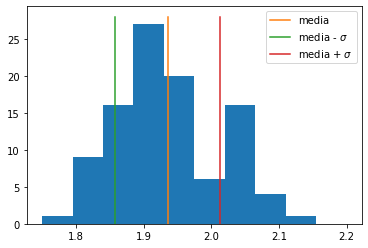

In [10]:
fig, ax = plt.subplots()
nevent, bins, patches = ax.hist(dati, nbins, range=xrange)
ax.plot(np.ones(2)*media2,[0,nevent.max()+1],label="media")
ax.plot(np.ones(2)*media2-deviazione_std2,[0,nevent.max()+1],label="media - $\sigma$")
ax.plot(np.ones(2)*media2+deviazione_std2,[0,nevent.max()+1],label="media + $\sigma$")
ax.legend();

In [ ]:
nevent       # Numero di eventi in ciacun bin

In [ ]:
bins         # Estremi dei bin

I patches sono i rettangoli (blu in questo caso) che vengono usati per disegnare l'istogramma.

<div style = "width:95%; padding:5px 10px 5px; border-style:solid; border-width:0px 0px 0px 10px; border-color:#b8d0d0; margin:20px 0px 10px 10px">
    <h4> Imparare Facendo</h4>
    Fate il diagramma delle frequenze dell'array <b>my_arr</b>. In particolare
<OL>
<LI>Determinate un <b>range</b> ragionevole. 
<LI>Variate il numero di bin, notando come un sia un numero troppo piccolo che uno troppo grande mascherano l'andamento dei dati.
<LI>Verificate se il valor medio e la standard deviation sono parametri utili nella comprensione di questo set di dati
</OL>
</div>

<div style = "width:95%; padding:5px 10px 5px; border-style:solid; border-width:0px 0px 0px 10px; border-color:#ff0000; margin:20px 0px 10px 10px">
    <h4> Attenzione!</h4>
    Lo studio grafico dei dati non va mai trascurato.<BR>
 In un notebook a parte <A HREF="anscombe.ipynb"> anscombe.ipynb</A> potete trovare un classico esempio di quanto sia pericoloso affidarsi completamente ai parametri statisti fondamentali: quattro set di dati che hanno la stessa media, la stessa deviazione standard e vengono interpolati dalla stessa retta pur essendo completamente diversi.
</div>

<div style= 'padding:20px 20px 0px 70px;'>
    <img src="../Humour/extrapolating2.png" width="850" align="left"/>
</div>

## 9.3 Numeri Casuali

Nelle versioni più recenti di Numpy (>1.17) è stata introdotto un oggetto default_rng i cui metodi possono essere utilizzati per generare
set di valori distribuiti secondo le singole distribuzioni di probabilità. 

In [ ]:
import matplotlib.pyplot as plt
from numpy.random import default_rng

rng = default_rng()

#help(np.random.default_rng)
#help(rng)

- Come generare numeri distribuiti secondo la distribuzione normale standard $\mu = 0.0,\, \sigma = 1.0\,$. 

In [ ]:
m1 = rng.normal(size=2000)

In [ ]:
nbins = 30
xrange = (-5,5)    # ntupla
fig, ax = plt.subplots()
nevent, bins, patches = ax.hist(m1, nbins, range=xrange)

- Come generare numeri distribuiti secondo la distribuzione normale con $\mu = -2.0,\, \sigma = 0.3\,$. 

In [ ]:
m2 = rng.normal(loc=-2., scale=0.3, size=2000)

In [ ]:
nbins = 300
xrange = (-5,1)    # ntupla
fig, ax = plt.subplots()
nevent, bins, patches = ax.hist(m2, nbins, range=xrange)

- Un modo di generare numeri **reali** secondo la distribuzione uniforme standard $[0,1]$. 

In [ ]:
#help(rng.uniform)

In [ ]:
m3 = rng.uniform(size=2000)

In [ ]:
nbins = 12
xrange = (-0.1,1.1)    # ntupla
fig, ax = plt.subplots()
nevent, bins, patches = ax.hist(m3, nbins, range=xrange)

- Un modo di generare numeri **interi** uniformemente distribuiti fra un minimo (incluso) e un massimo (escluso). 

In [ ]:
#help(rng.integers)

In [ ]:
m4 = rng.integers(0,high=100,size=20)
m4

    In letteratura si trovano ancora i generatori di numeri casuali meno recenti
    =============================================================================
    rand                 Uniformly distributed values.
    randn                Normally distributed values.
    ranf                 Uniformly distributed floating point numbers.
    randint              Uniformly distributed integers in a given range.
    =============================================================================
    

Si può fissare il "seme" del generatore di numeri casuali in modo da ottenere la stessa sequenza più volte.
Utile qundo si vogliono capire le analisi statistiche fatte da qualcun altro.

In [ ]:
rng1 = default_rng(12345)
rng2 = default_rng(12345)

In [ ]:
m3_1 = rng1.uniform(size=200)

In [ ]:
m3_2 = rng2.uniform(size=200)

In [ ]:
m3_1 == m3_2

In [ ]:
rng3 = default_rng(12345)
rng4 = default_rng(12345)

In [ ]:
m1_1 =rng3.normal(size=1000)
#m1_1

In [ ]:
m1_2 =rng4.normal(size=1000)
#m1_2

In [ ]:
all(m1_1 == m1_2)

<div style= 'padding:20px 20px 0px 150px;'>
    <img src="../Humour/NormalDistribution.jpg" width="400" align="left"/>
</div>

<div style = "width:95%; padding:5px 10px 5px; border-style:solid; border-width:0px 0px 0px 10px; border-color:#b8d0d0; margin:20px 0px 10px 10px">
    <h4> Imparare Facendo</h4>
    
Producete campioni casuali estratti da una distribuzione normale, con valor medio $\mu = 3.$ e deviazione standard $\sigma = 0.7$, di 50, 100, 500, 5000 elementi.
    Di ciascun campione
<OL>
<LI>Fate l'istogramma delle frequenze.
<LI>Sovrapponete all'istogramma delle frequenze la funzione densità di probabilità gaussiana di valor medio $\mu$ e deviazione standard $\sigma$, facendo attenzione che la curva e l'istogramma siano confrontabili. Cosa è necessario fare?
</OL>
</div>